In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv('data/kc_house_data.csv')

df.drop_duplicates(inplace=True)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# sqft_basement => continuous 

#df['sqft_basement'].unique()
# '?' => drop 
#df.loc[df['sqft_basement']=='?'] = 'NaN'

#df.sqft_basement = df.astype({"sqft_basement":'float64'})


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


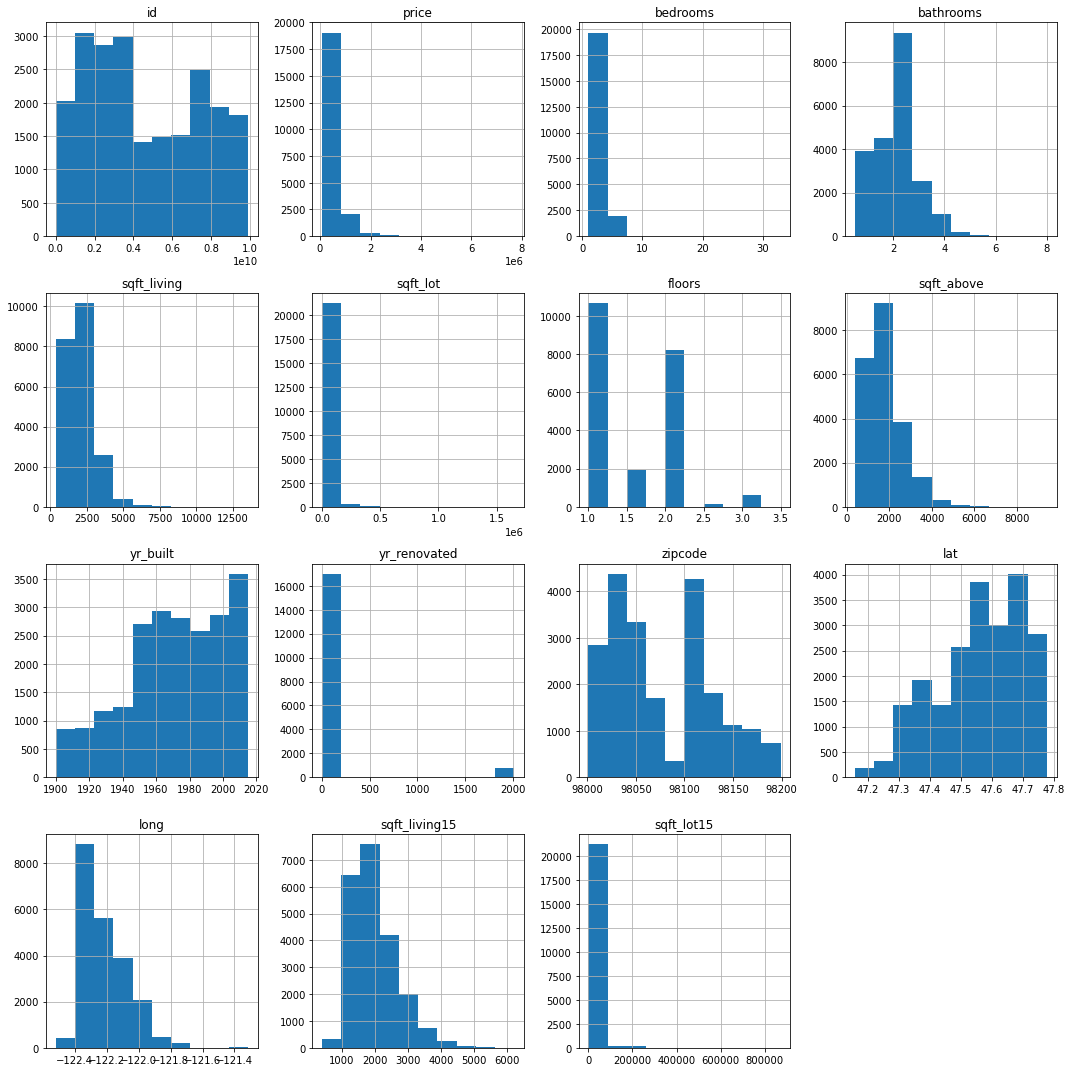

In [8]:
# Histogram for continuous variables 
cols = []
for x in df.columns: 
    if df[x].dtype != 'object': 
        cols.append(x)

df[cols].hist(figsize=(15,15))
plt.tight_layout()

In [9]:
df.select_dtypes('object').describe()

# sqft_basement => continuous 

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


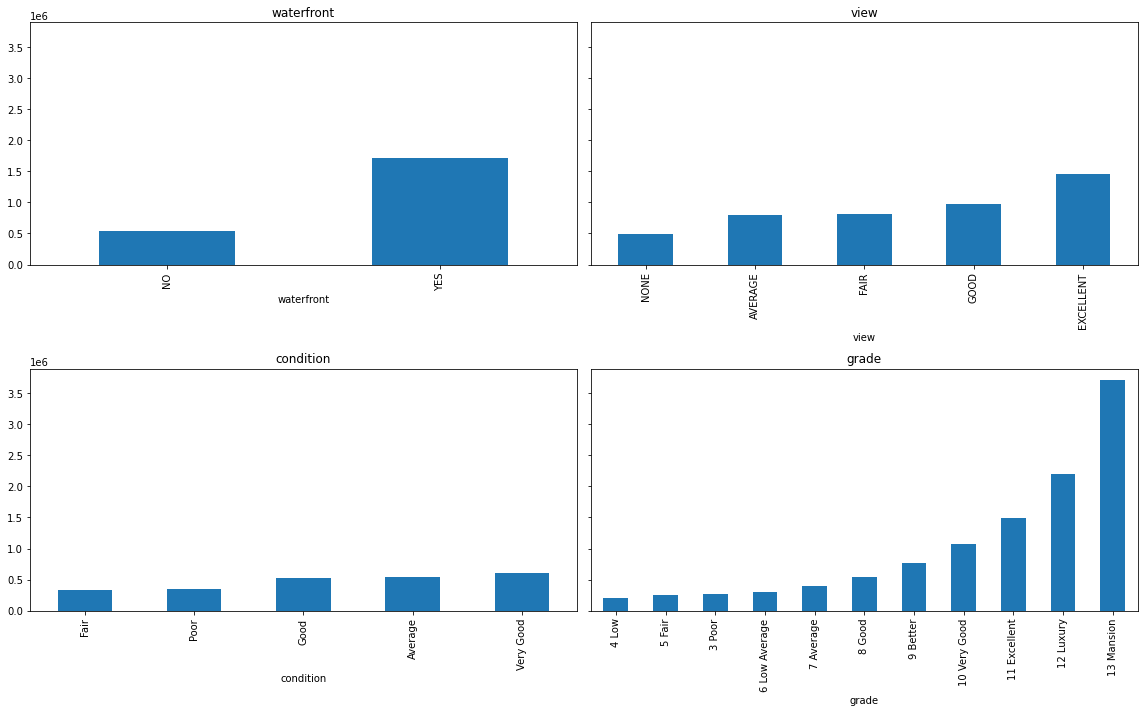

In [10]:
# Bar plots of average housing price by categories. 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16 , 10), sharey=True)

#select datatype=object
cate = df.select_dtypes('object').columns.drop(['date','sqft_basement'])

for xcol, ax in zip(cate, axes.flatten()):
    df.groupby(xcol).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(xcol)  
    
    
fig.tight_layout()

In [11]:
# The data covers 2014 & 2015. 
pd.DatetimeIndex(df['date']).year.unique()

Int64Index([2014, 2015], dtype='int64', name='date')

In [12]:
# Number of houses sold by month 
pd.DatetimeIndex(df['date']).month.value_counts()

# May, April, July, June, Aug are busy months. Jan, Feb, Nov, Dec are low season. 


5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: date, dtype: int64

In [13]:
# Drop the following variables (according to the project description). 

drop=['view', 'sqft_above', 'sqft_basement', 'yr_renovated',
      'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [14]:
# reassigne dataframe

df.drop(labels=drop, axis=1, inplace=True)

In [15]:
df.info()
# 12 variables, n=21597 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  object 
 11  yr_built     21597 non-null  int64  
 12  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.3+ MB


In [16]:
# 5 points statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.0,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
yr_built,21597.0,1.971000e+03,2.937523e+01,1900.0,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
zipcode,21597.0,9.807795e+04,5.351307e+01,98001.0,9.803300e+04,9.806500e+04,9.811800e+04,9.819900e+04


### 1. Data manipulation

#### 1.1 Missing variables (waterfront)

In [17]:
# waterfront has 2376 missing variables 
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [18]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [19]:
# convert nan => 'N/A'
df.waterfront = df.waterfront.fillna('N/A')

In [20]:
df.waterfront.unique()

array(['N/A', 'NO', 'YES'], dtype=object)

In [21]:
# zipcode of houses for missing waterfront variables  
waterfront_na = df.loc[df.waterfront=='N/A']
waterfront_na.zipcode.unique()

# from the zipcode, can not tell if 'N/A' = 'NO'

array([98178, 98007, 98030, 98074, 98105, 98166, 98004, 98056, 98058,
       98168, 98118, 98003, 98133, 98177, 98034, 98103, 98126, 98038,
       98040, 98053, 98023, 98052, 98042, 98059, 98117, 98146, 98014,
       98006, 98116, 98033, 98115, 98045, 98019, 98055, 98188, 98024,
       98125, 98198, 98031, 98109, 98002, 98065, 98144, 98199, 98092,
       98102, 98155, 98075, 98011, 98136, 98072, 98008, 98106, 98027,
       98029, 98005, 98070, 98028, 98022, 98108, 98010, 98001, 98112,
       98077, 98107, 98122, 98148, 98119, 98032, 98039])

#### 1.2 Housing price (y)

Text(0, 0.5, 'Density')

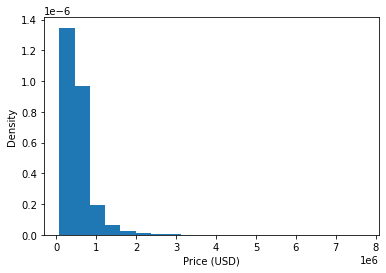

In [22]:
# Outliers skewe the distribution.  
plt.hist(x=df.price, bins=20, density=True)

plt.xlabel("Price (USD)")
plt.ylabel('Density')


In [23]:
print(f'Threshold price for top 1%: {df.price.quantile(0.99)}')
print(f'Threshold price for top 2.5%: {df.price.quantile(0.975)}')
print(f'Threshold price for top 5%: {df.price.quantile(0.95)}')

Threshold price for top 1%: 1970000.0
Threshold price for top 2.5%: 1490000.0
Threshold price for top 5%: 1160000.0


Text(0, 0.5, 'density')

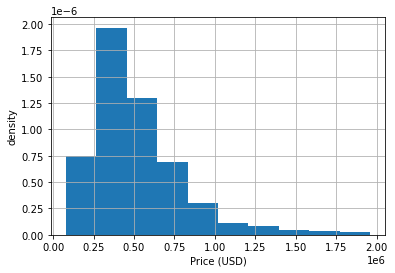

In [24]:
# If we drop top 1% (price >= 1970000), distribution looks less skewed 

df.loc[df.price < 1970000].price.hist(density=True)
plt.xlabel("Price (USD)")
plt.ylabel('density')

In [25]:
# Log transformation 
df['price_log']=np.log(df.price)

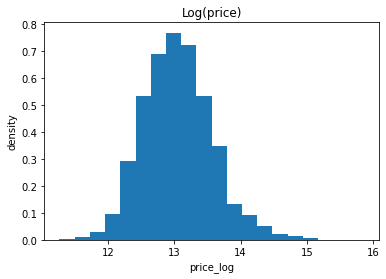

In [26]:
# Distribution of log(price) 

plt.hist(x=df.price_log, bins=20, density=True)
plt.title('Log(price)')
plt.xlabel('price_log')
plt.ylabel('density');

#### 1.3 Dependent Variables (X)

##### Number of bedrooms

In [27]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [28]:
# Drop outlier (the house with 33 bedrooms)
df = df.loc[df.bedrooms!=33]

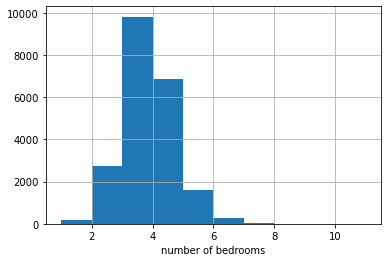

In [29]:
df.bedrooms.hist()
plt.xlabel('number of bedrooms');

# change to categorical values?? 

##### Number of Bathrooms

In [30]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [31]:
## what is .25, .75?? 
# convert to categorical values? 

##### Sqft_living

<AxesSubplot:>

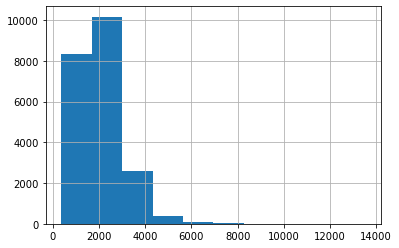

In [32]:
df.sqft_living.hist()

In [33]:
print(f'Threshold sqft_living for top 1%: {df.sqft_living.quantile(0.99)}')
print(f'Threshold sqft_living for top 2.5%: {df.sqft_living.quantile(0.975)}')
print(f'Threshold sqft_living for top 5%: {df.sqft_living.quantile(0.95)}')

Threshold sqft_living for top 1%: 4980.0
Threshold sqft_living for top 2.5%: 4270.0
Threshold sqft_living for top 5%: 3760.0


In [34]:
# Average housing price for over 5000 sqft house
print (f'Average housing price for over 5000 sqft houses: {df.loc[df.sqft_living > 5000].price.mean()}')
# Housing grade 
df.loc[df.sqft_living > 5000].grade.value_counts()


Average housing price for over 5000 sqft houses: 2071881.0426540284


11 Excellent    96
10 Very Good    46
12 Luxury       44
9 Better        13
13 Mansion      11
8 Good           1
Name: grade, dtype: int64

##### sqft_lot

<AxesSubplot:>

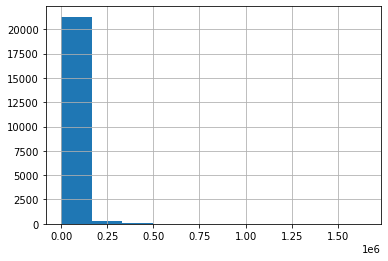

In [35]:
df.sqft_lot.hist()

In [36]:
print(f'Threshold sqft_lot for top 1%: {df.sqft_lot.quantile(0.99)}')
print(f'Threshold sqft_lot for top 2.5%: {df.sqft_lot.quantile(0.975)}')
print(f'Threshold sqft_lot for top 5%: {df.sqft_lot.quantile(0.95)}')

Threshold sqft_lot for top 1%: 213008.0
Threshold sqft_lot for top 2.5%: 85244.875
Threshold sqft_lot for top 5%: 43308.75


In [37]:
df.sqft_lot.sort_values(ascending=False)[:20]

1717     1651359
17305    1164794
7640     1074218
7762     1024068
3945      982998
4437      982278
6685      920423
7070      881654
20436     871200
9705      871200
4536      843309
12993     715690
13464     641203
16174     623779
7287      577605
17811     542322
17562     533610
12906     507038
2962      505166
20405     503989
Name: sqft_lot, dtype: int64

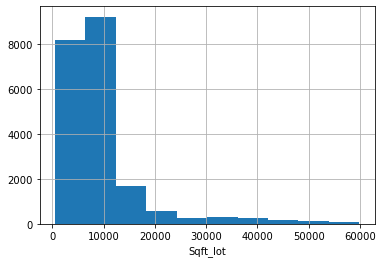

In [38]:
# If we drop sqft_lot >= 60000 (14 observations), distribution looks more normal. 
df.loc[df.sqft_lot < 60000].sqft_lot.hist()
plt.xlabel("Sqft_lot");

df.head()

In [39]:
# if sqft_lot is smaller than sqft_living => Drop 
df['lot_living'] = df['sqft_lot'] - df['sqft_living']
print(f'Number of houses which report sqft_lot < sqft_living: {len(df.loc[df.lot_living<0])}.')

Number of houses which report sqft_lot < sqft_living: 788.


In [40]:
# drop 788 observations which reported sqft_lot < sqft_living. 
df = df.loc[df.lot_living >= 0]

##### floors

<AxesSubplot:>

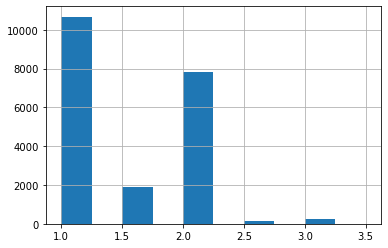

In [41]:
df.floors.hist()
# convert to categorial values? 

##### condition (categorical value)

In [42]:
df.condition.value_counts()

Average      13247
Good          5669
Very Good     1693
Fair           170
Poor            29
Name: condition, dtype: int64

##### grade (categorical value)

In [43]:
df.grade.value_counts()

7 Average        8799
8 Good           5587
9 Better         2505
6 Low Average    2037
10 Very Good     1115
11 Excellent      394
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

##### yr_built

<AxesSubplot:>

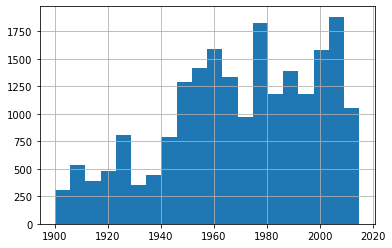

In [44]:
df.yr_built.hist(bins=20)

In [45]:
# vintage = year of house was sold - year of house was built  

# year of house was sold 
df['yr_sold']=pd.DatetimeIndex(df['date']).year

# year of house was sold - year of house was built
df['vintage'] = df['yr_sold'] - df['yr_built']


In [46]:
# some people purchase houses before it is built 
print (f'Number of houses sold before built: {len(df.loc[df.vintage<0])}')

Number of houses sold before built: 8


In [47]:
# For these houses, change vintage to 0
df.vintage.replace({-1:0}, inplace=True)


In [48]:
df.loc[df.vintage<0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,price_log,lot_living,yr_sold,vintage


##### zipcode

In [49]:
# Create seattle dummy 
# In a city, sqft is smaller, price is higher. So, relationship between price and other house features will be different between houses in Seattle and houses outside of Seattle.

# 28 zipcodes for Seattle 
seattle_zipcode=[98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177]

df['seattle'] = [1 if x in seattle_zipcode else 0 for x in df.zipcode]
df.seattle.sum()
# 6297 houses are in seattle 

6297

In [50]:
# number of observations = 2080
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20808 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20808 non-null  int64  
 1   date         20808 non-null  object 
 2   price        20808 non-null  float64
 3   bedrooms     20808 non-null  int64  
 4   bathrooms    20808 non-null  float64
 5   sqft_living  20808 non-null  int64  
 6   sqft_lot     20808 non-null  int64  
 7   floors       20808 non-null  float64
 8   waterfront   20808 non-null  object 
 9   condition    20808 non-null  object 
 10  grade        20808 non-null  object 
 11  yr_built     20808 non-null  int64  
 12  zipcode      20808 non-null  int64  
 13  price_log    20808 non-null  float64
 14  lot_living   20808 non-null  int64  
 15  yr_sold      20808 non-null  int64  
 16  vintage      20808 non-null  int64  
 17  seattle      20808 non-null  int64  
dtypes: float64(4), int64(10), object(4)
memory usa

### 2. Plotting price (y) and features (X) 

In [51]:
## scatter plot for continuous variables 

cont = df.select_dtypes(('int64', 'float64')).columns.drop(['id', 'yr_built', 'zipcode','seattle', 'yr_sold', 'price_log', 'bedrooms', 'floors'])
cont

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'lot_living',
       'vintage'],
      dtype='object')

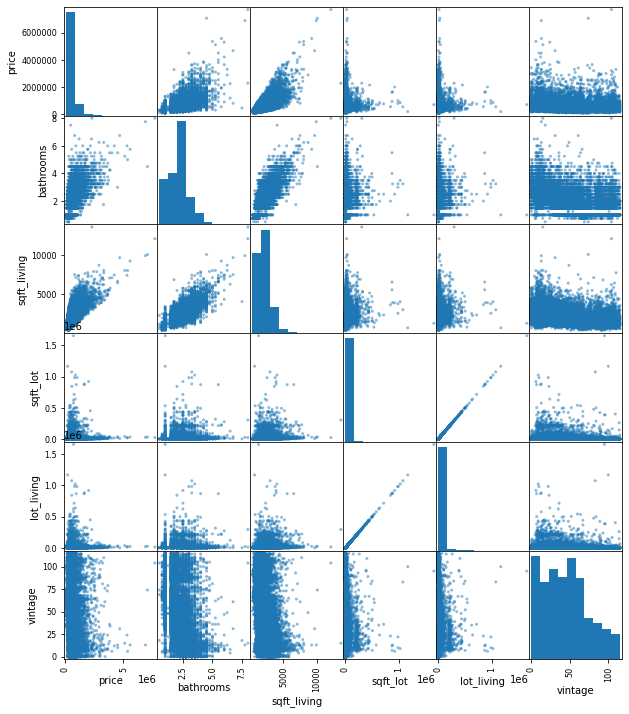

In [52]:
pd.plotting.scatter_matrix(df[cont], figsize=(10,12));

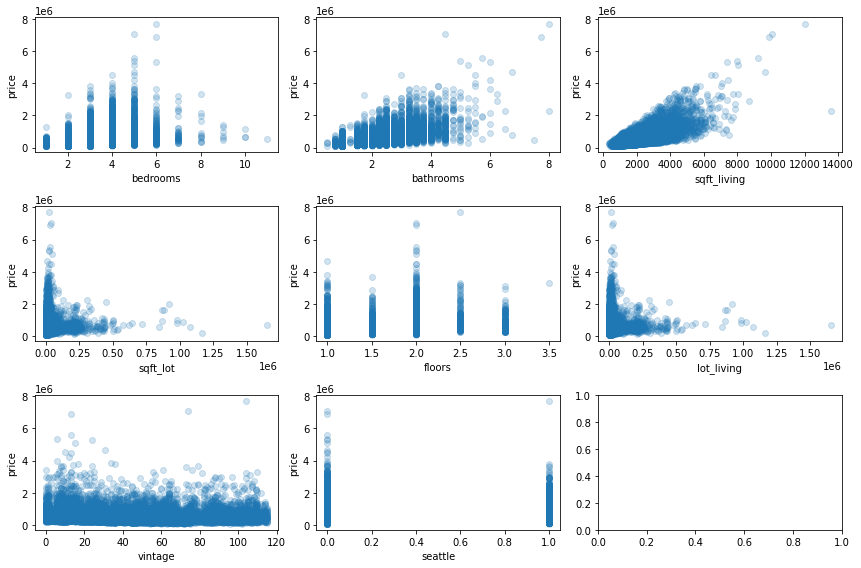

In [53]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
fig.set_tight_layout(True)

xcont = df.select_dtypes(('int64', 'float64')).columns.drop(['id', 'yr_built', 'zipcode', 'yr_sold', 'price_log', 'price'])


for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df[xcol], df['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")
    

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,price_log,lot_living,yr_sold,vintage,seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,N/A,Average,7 Average,1955,98178,12.309982,4470,2014,59,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,13.195614,4672,2014,63,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,12.100712,9230,2015,82,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,13.311329,3040,2014,49,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,13.142166,6400,2015,28,0


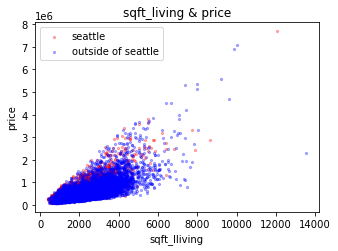

In [64]:
# Plot sqft_living and price 

plt.figure(figsize=(4.8, 3.6))
plt.scatter(x = df.loc[df.seattle==1].sqft_living , 
            y = df.loc[df.seattle==1].price , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0].sqft_living , 
            y = df.loc[df.seattle==0].price , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lliving")
plt.ylabel("price")
plt.title("sqft_living & price")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

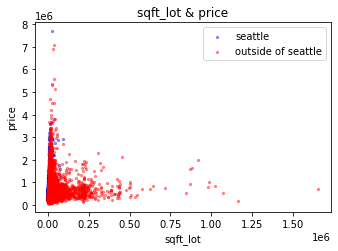

In [65]:
# Plot sqft_lot and price 

plt.figure(figsize=(4.8, 3.6))
plt.scatter(x = df.loc[df.seattle==1].sqft_lot , 
            y = df.loc[df.seattle==1].price , 
            c='b', s=5, 
            alpha=0.4)
plt.scatter(x = df.loc[df.seattle==0].sqft_lot , 
            y = df.loc[df.seattle==0].price , 
            c='r', s=5, 
            alpha=0.4)
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.title("sqft_lot & price")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()


In [ ]:
# Average housing price by categories. 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20 , 8), sharey=False)
fig.set_tight_layout(True)

#select datatype=object
cate = df.select_dtypes(('object')).columns.drop(['date'])

for xcol, ax in zip(cate, axes.flatten()):
    df.groupby(xcol).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(xcol)  
    
    
fig.tight_layout()


## grade => excellent (11-13), good (8-10), average(6-7), poor(3-5)
## condition => anove average (average,good, very good)? 
## water front => Yes and others? 

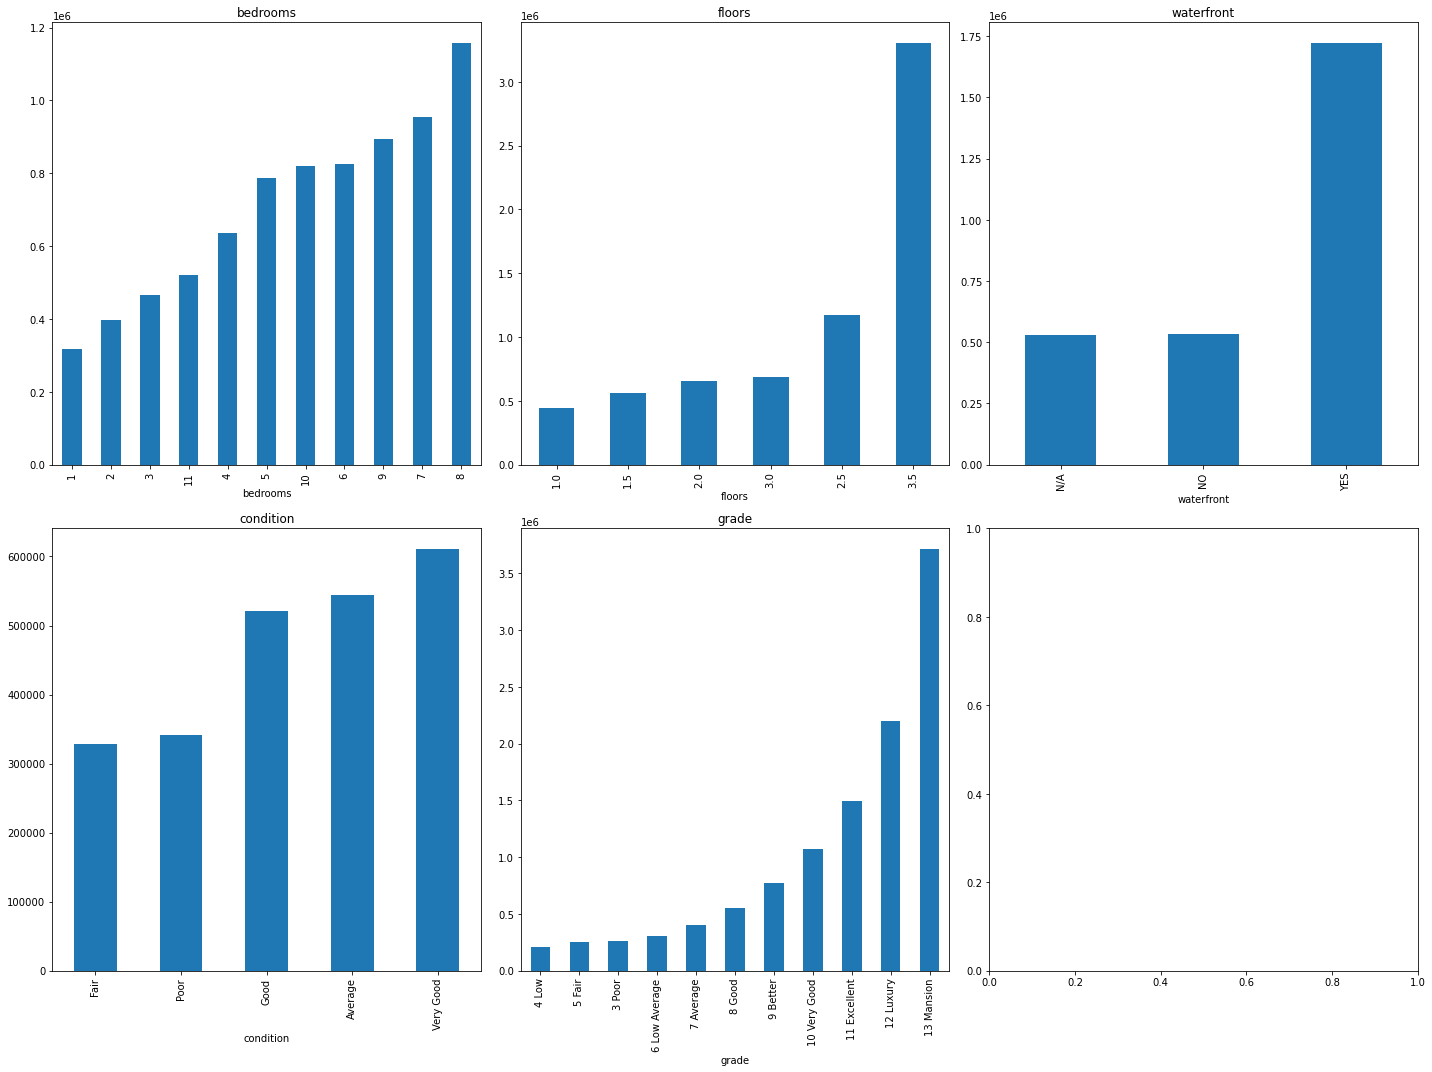

In [66]:
# Average price for categorical variables (+ bedrooms, floors) 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20 , 15), sharey=False)

barchart = ['bedrooms', 'floors', 'waterfront', 'condition', 'grade']

for x, ax in zip(barchart, axes.flatten()):
    df.groupby(x).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(x)  
    
    
fig.tight_layout()


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

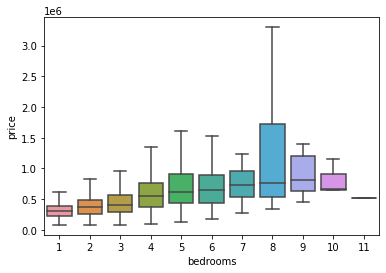

In [67]:
sns.boxplot(x='bedrooms', y='price', data=df, showfliers = False)

<AxesSubplot:xlabel='floors', ylabel='price'>

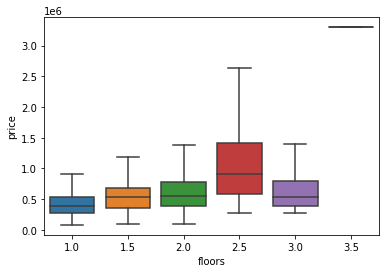

In [68]:
sns.boxplot(x='floors', y='price', data=df, showfliers = False)

In [ ]:
df.floors.value_counts()
# drop 3.5 floor house? 